Kernel: We need to use the Python 3.9.7 from the Anaconda distribution.

#  **1. Import libraries**

First, we need to import some libraries for data processing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7) # Long plot

* `pandas:` offers data structures and operations to manipulate numerical tables and time series.
* `numpy:` offers a giant collection of high-level mathematical functions to operate on arrays and matrices.
* `matplotlib:` offers an interactive visualization lile plotting graphs.

# **2. Data Collection**

## ***2.1 Get raw data***

Our data is stored in a CSV files.

In [2]:
data_dirs_list = ['../Data/FIE00144982.csv', '../Data/GM000004204.csv', '../Data/NLM00006235.csv', '../Data/SWE00139148.csv', '../Data/USW00094728.csv']
dfs = []
for data_dir in data_dirs_list:
    dfs.append(pd.read_csv(data_dir))

print(dfs)

[        STATION  DATE  LATITUDE  LONGITUDE  ELEVATION                NAME  \
0   FIE00144982  1970   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
1   FIE00144982  1971   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
2   FIE00144982  1972   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
3   FIE00144982  1973   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
4   FIE00144982  1974   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
5   FIE00144982  1975   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
6   FIE00144982  1976   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
7   FIE00144982  1977   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
8   FIE00144982  1978   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
9   FIE00144982  1979   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
10  FIE00144982  1980   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI   
11  FIE00144982  1981   63.3206    30.0492       98.0  LIEKSA LAMPELA, FI  

Then, we will get the average temperatures data from the CSV files.

In [3]:
temperatures = []
for df in dfs:
    temperatures.append(df[['DATE', 'TAVG']])

for i  in range(len(temperatures)):
    print("Station: ", data_dirs_list[i])
    print(temperatures[i])

Station:  ../Data/FIE00144982.csv
    DATE  TAVG
0   1970   NaN
1   1971  0.97
2   1972  3.09
3   1973  1.63
4   1974  3.69
5   1975  3.55
6   1976  0.26
7   1977  1.93
8   1978  0.14
9   1979  1.86
10  1980  0.98
11  1981  2.02
12  1982  2.25
13  1983  2.53
14  1984  3.08
15  1985 -0.05
16  1986  1.64
17  1987 -0.27
18  1988  2.05
19  1989  4.14
20  1990  2.72
21  1991  2.43
22  1992  2.52
23  1993  1.47
24  1994  1.61
25  1995  2.87
26  1996  1.92
27  1997  1.92
28  1998  1.45
29  1999  2.61
30  2000  3.98
31  2001  2.13
32  2002  2.05
33  2003  2.67
34  2004  2.52
35  2005  3.44
36  2006  2.73
37  2007  3.33
38  2008  3.66
39  2010  1.23
40  2011  3.57
41  2012  2.03
42  2013  3.72
43  2014  4.03
44  2015  4.41
45  2016  3.63
46  2017  3.10
47  2018  3.48
48  2019  3.11
49  2020  4.90
50  2021  2.66
Station:  ../Data/GM000004204.csv
     DATE   TAVG
0    1824   8.52
1    1825   9.34
2    1826   9.21
3    1827   8.75
4    1828   9.50
..    ...    ...
188  2017  11.08
189  2018  11.66

Now, let's find if there is some missing cells in the data.

In [4]:
processing_starting_year = 1991
processing_ending_year = 2020
years_list = [x for x in range(processing_starting_year, processing_ending_year + 1)]

def find_if_missing(temp):  # temp = temperature
    
    years = []

    for i in range(len(temp)):
        years.append(int(temp.iloc[i]['DATE']))

    starting_position = years.index(processing_starting_year)
    ending_position = years.index(processing_ending_year)

    missing_years = []
    available_years = []

    for i in range(starting_position, ending_position + 1, 1):
        if np.isnan(temp.iloc[i]['TAVG']):
            missing_years.append(years[i])
        else:
            available_years.append(years[i])

    not_available_years = list(set(years_list) - set(available_years))
    # print(not_available_years)

    answer = missing_years + not_available_years

    return answer
    
    

# print(len(temperatures))
# print(len(data_dirs_list))

for i in range(0, len(temperatures)):
    print("Station: ", data_dirs_list[i])
    
    missing = find_if_missing(temperatures[i])

    if len(missing) == 0:
        print("No missing data")
    else:
        print("Missing data: ", missing)

Station:  ../Data/FIE00144982.csv
Missing data:  [2009]
Station:  ../Data/GM000004204.csv
No missing data
Station:  ../Data/NLM00006235.csv
No missing data
Station:  ../Data/SWE00139148.csv
No missing data
Station:  ../Data/USW00094728.csv
No missing data


Oops, there is a missing cell in data of the first station. Let's fix it.

In [5]:
def fill_missing_data(temp):
    years = []

    for i in range(len(temp)):
        years.append(int(temp.iloc[i]['DATE']))

    starting_position = years.index(processing_starting_year)
    ending_position = years.index(processing_ending_year)

    years_data = years[starting_position:ending_position + 1]

    missing_years = find_if_missing(temp)
    
    if len(missing_years) > 0:
        for year in missing_years:  # there is only one missing cell
            # print("Year: ", year)
            before_position = years.index(year - 1)
            after_position = years.index(year + 1)
            # print("Before: ", years[before_position])
            # print("After: ", years[after_position])

            before_value = temp.iloc[before_position]['TAVG']
            after_value = temp.iloc[after_position]['TAVG']
            # print("Before value:" , before_value)
            # print("After value: ", after_value)
            new_value = round((before_value + after_value) / 2, 2)
            # print("New value: ", new_value)

            
            temperatures_data = []
            for i in range(starting_position, before_position + 1, 1):
                temperatures_data.append(temp.iloc[i]['TAVG'])
            temperatures_data.append(new_value)
            for i in range(after_position, ending_position + 1, 1):
                temperatures_data.append(temp.iloc[i]['TAVG'])

            return temperatures_data

Now, data will be written to csv files for later use.

In [6]:
def write_data_to_csv_files(temp, file_name):  # temp = temperature
    years = []

    for i in range(len(temp)):
        years.append(int(temp.iloc[i]['DATE']))

    starting_position = years.index(processing_starting_year)
    ending_position = years.index(processing_ending_year)

    years_data = []
    for i in range(processing_starting_year, processing_ending_year + 1, 1):
        years_data.append(i)
    # print(years_data)

    temperatures_data = []

    missing_years = find_if_missing(temp)
    if len(missing_years) > 0:
        temperatures_data =  fill_missing_data(temp)
    else:
        for i in range(starting_position, ending_position + 1, 1):
            temperatures_data.append(temp.iloc[i]['TAVG'])

    data = {'Year': years_data, 'Temperature': temperatures_data}
    df = pd.DataFrame(data)
    df.to_csv(file_name, index = False)

    # print(temperatures_data)

for i in range(len(temperatures)):
    file_name = "data" + str(i) + ".csv"
    write_data_to_csv_files(temperatures[i], file_name)


Now, we will visualize data by scatter graphs.

In [7]:
def visualize_data(file_name):
    df = pd.read_csv(file_name)
    years_data = df.loc[:, "Year"].to_numpy()
    # print(years_data)

    temperatures_data = df.loc[:, "Temperature"].to_numpy()
    # print(temperatures_data)

    plt.scatter(years_data, temperatures_data, linewidths=0.6)

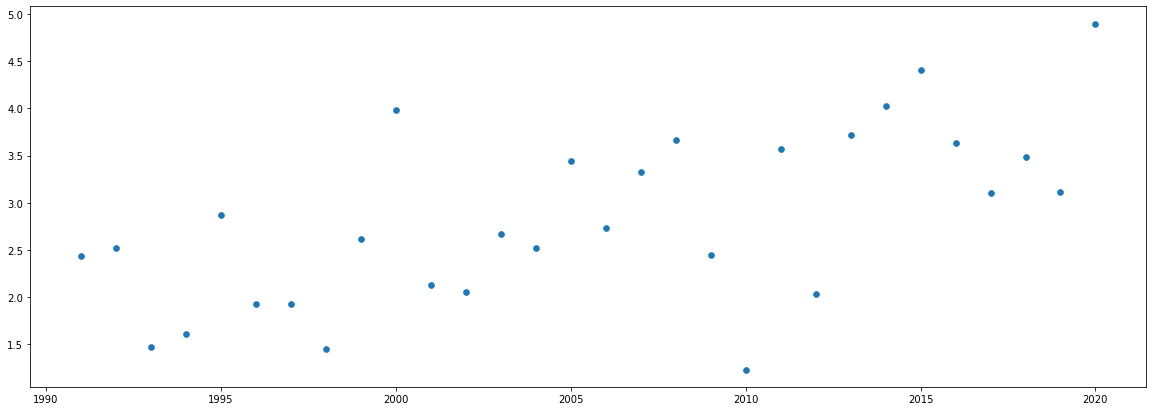

In [8]:
visualize_data("data0.csv")

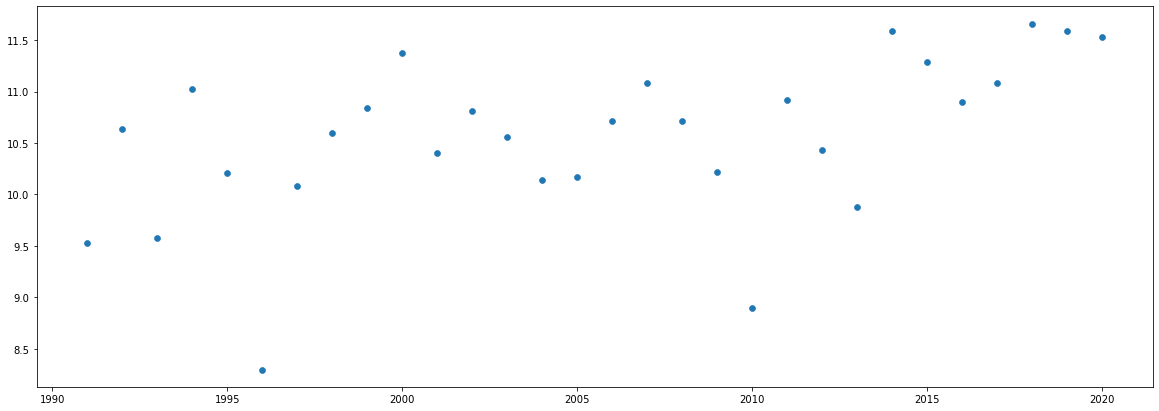

In [9]:
visualize_data("data1.csv")

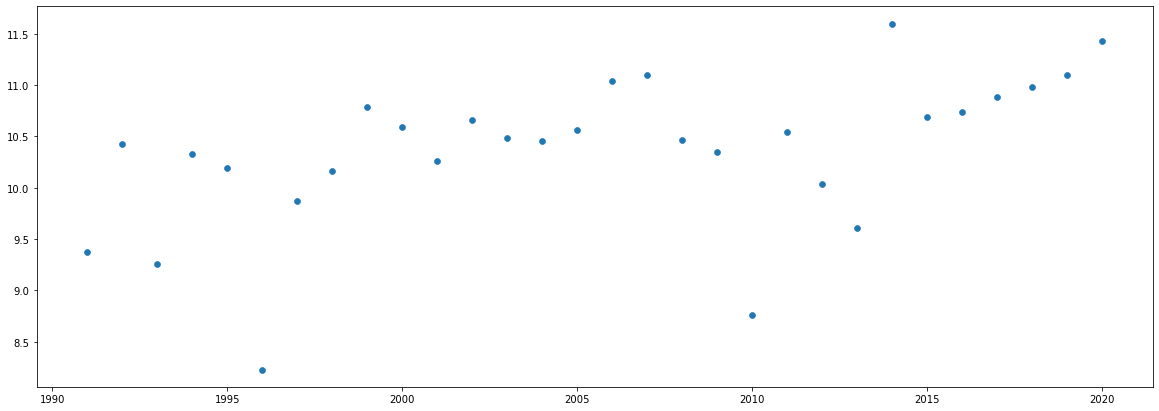

In [10]:
visualize_data("data2.csv")

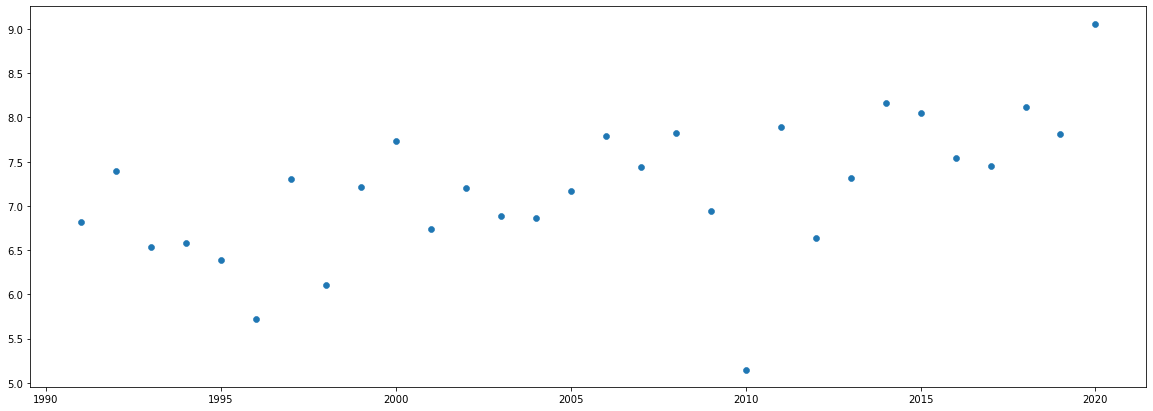

In [11]:
visualize_data("data3.csv")

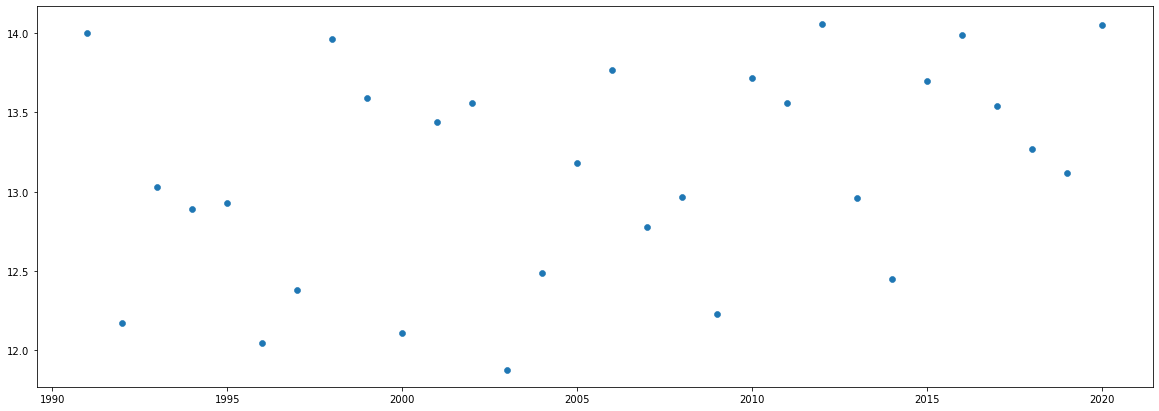

In [12]:
visualize_data("data4.csv")

In [13]:
from itertools import combinations
def model_generate(_col):
    return [
            (_col, 'x', lambda x: x),
            (np.power(_col, 2), 'x^2', lambda x: np.power(x, 2)),
            (np.power(_col, 3), 'x^3', lambda x: np.power(x, 3)),
            (np.power(_col, 4), 'x^4', lambda x: np.power(x, 4)),
            (np.log(_col), 'log(x)', lambda x: np.log(x)),
            (np.sin(_col), 'sin(x)', lambda x: np.sin(x)),
            (np.multiply(np.sin(_col), np.log(_col)), 'log(x) * sin(x)', 
             lambda x: np.multiply(np.sin(x), np.log(x)))
    ]

In [14]:
from itertools import chain, combinations
from sklearn.metrics import r2_score
def powerset(iterable):
    "powerset([1,2,3]) --> (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

def calculate_theta(A, y):
    return np.linalg.inv(A.T * A) * A.T * y

def find_model(x, y):
    N = x.shape[0] # get number of rows
    _best_r2 = -np.Inf
    _best_model = None
    _best_theta = None
    _best_model_as_text = None
    for _model in powerset(model_generate(x)):
        A = np.ones((N, 1))
        for _elem in _model:
            A = np.concatenate((A, _elem[0]), axis = 1) # Merge columns
        try:
            theta = calculate_theta(A, y)
            y_hat = A * theta
            r2 = r2_score(np.squeeze(np.asarray(y, dtype=np.float64)), 
                            np.squeeze(np.asarray(y_hat, dtype=np.float64)))
            if _best_r2 < r2:
                _best_model = [item[2] for item in _model]
                _best_model_as_text = [item[1] for item in _model]
                _best_r2 = r2
                _best_theta = theta
        except:
            continue
    _text = ""
    _text += str(float(_best_theta[0])) + " + " 
    _text += "".join([str(np.round(a[0], 5)) + "*" + b + " + " 
                      for a,b in zip(np.asarray(_best_theta[1:]), _best_model_as_text)])[:-2]
    return (_best_r2, _text, _best_model, _best_theta)

def eval_value(_model, _theta, x):
    result = float(_theta[0])
    for model, theta in (zip(_model, _theta[1:])):
        result = result + float(model(x)) * float(theta)
    return result

def regression(file_name):
    # regression model
    df = pd.read_csv(file_name)
    x = np.matrix(np.arange(1991, 2020 + 1), dtype = np.float64).T # create N * 1 matrix
    y = np.matrix(list(df.iloc[:]['Temperature']), dtype = np.float64).T # create N * 1 matrix
    plt.scatter(np.squeeze(np.asarray(x)), 
                np.squeeze(np.asarray(y)), 
                linewidths=0.6)
    
    
    _r2, _text, _model, _theta = find_model(x, y)
    print(f"Best r2: {_r2}")
    print(f"Model: {_text}")

    x_test = np.linspace(1990, 2050, 200)
    y_test = np.array([eval_value(_model, _theta, _x) for _x in x_test])
    plt.plot(x_test, y_test)
    plt.show()

Best r2: 0.4152716333306189
Model: -428760.8877986716 + 572.43424*x + -0.21496*x^2 + 0.0*x^4 + 336.39369*sin(x) + -44.23939*log(x) * sin(x) 


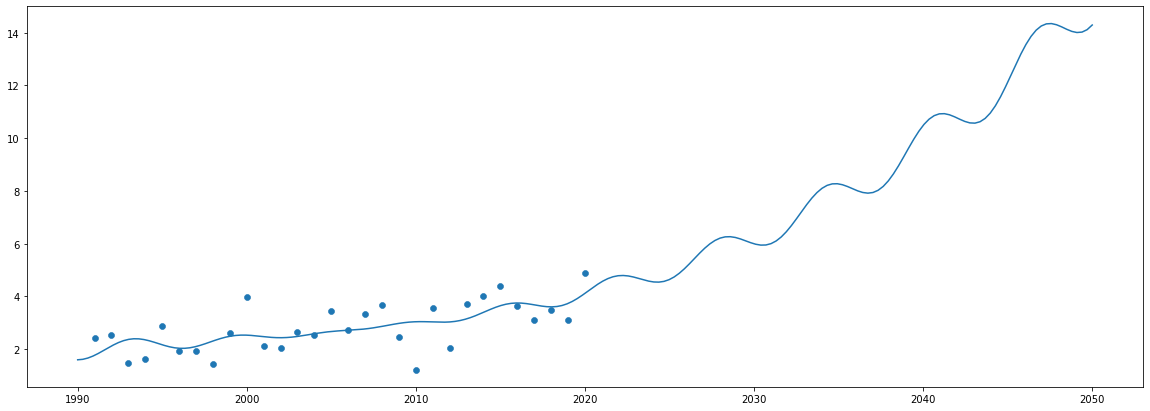

In [15]:
regression("data0.csv") 

Best r2: 0.43883419511592425
Model: -2240889.587199211 + 2981.88199*x + -1.11596*x^2 + 0.0*x^4 + 474.80371*sin(x) + -62.40748*log(x) * sin(x) 


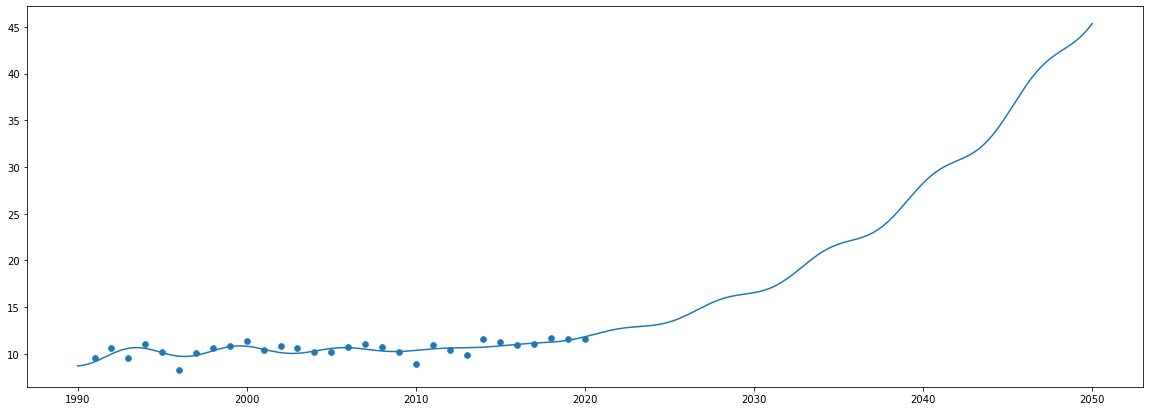

In [16]:
regression("data1.csv") 

Best r2: 0.3831435591080794
Model: -2110487.082359817 + 2806.3352*x + -1.04951*x^2 + 0.0*x^4 + 405.11019*sin(x) + -53.25191*log(x) * sin(x) 


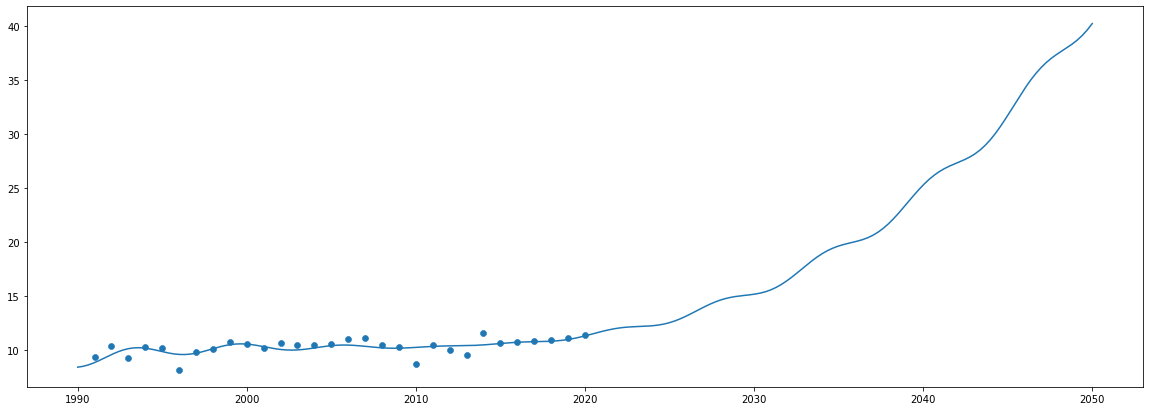

In [17]:
regression("data2.csv") 

Best r2: 0.3877112193377744
Model: -1096522.0636323318 + 1461.34733*x + -0.54775*x^2 + 0.0*x^4 + 207.56986*sin(x) + -27.28003*log(x) * sin(x) 


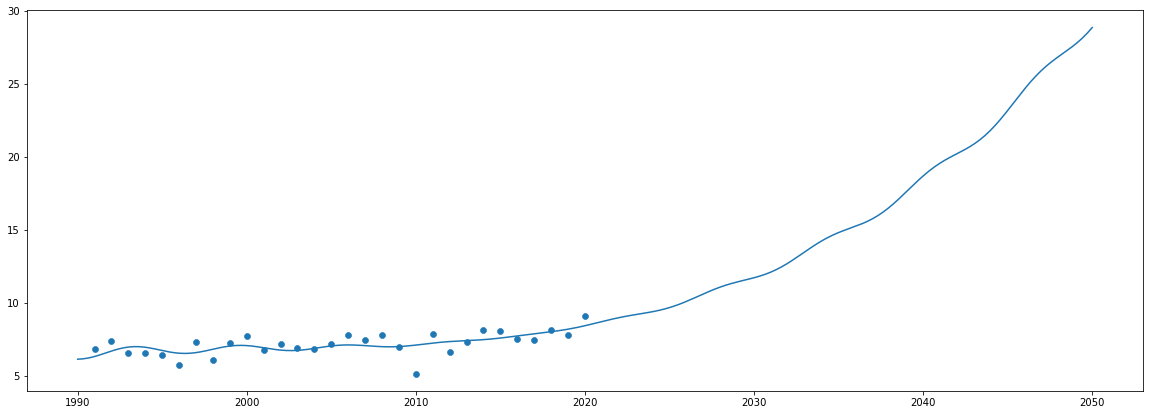

In [18]:
regression("data3.csv") 

Best r2: 0.15745734304409686
Model: 91696.26412356505 + 6.95143*x + -13891.27228*log(x) + 120.21781*sin(x) + -15.79415*log(x) * sin(x) 


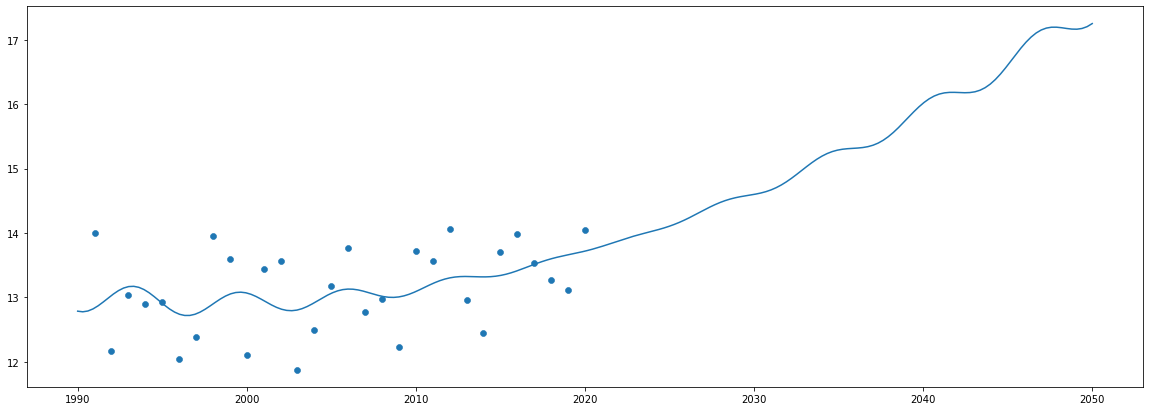

In [19]:
regression("data4.csv") 